In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset=pd.read_csv('indian_liver_patient.csv')

In [5]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
dataset.shape


(583, 11)

In [7]:
dataset.columns


Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [8]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [9]:
dataset.duplicated().sum()

13

In [10]:
dataset=dataset.drop_duplicates()
print(dataset.shape)

(570, 11)


In [11]:
# checking for any missing values
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

<Axes: xlabel='Albumin_and_Globulin_Ratio'>

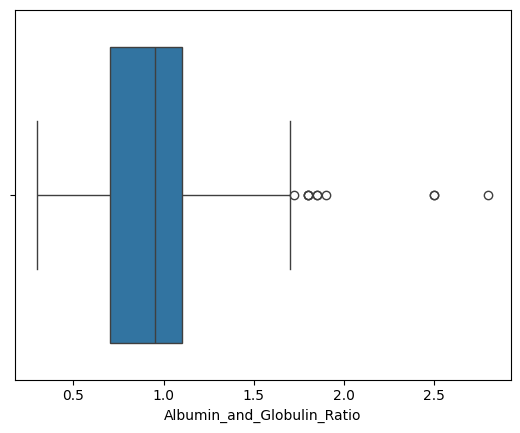

In [12]:
sns.boxplot(data=dataset,x='Albumin_and_Globulin_Ratio')

In [13]:
dataset['Albumin_and_Globulin_Ratio'].mode()

0    1.0
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [14]:
dataset['Albumin_and_Globulin_Ratio'].median()

0.95

In [15]:
dataset['Albumin_and_Globulin_Ratio'].mean()

0.9480035335689044

In [16]:
dataset['Albumin_and_Globulin_Ratio']=dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [17]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

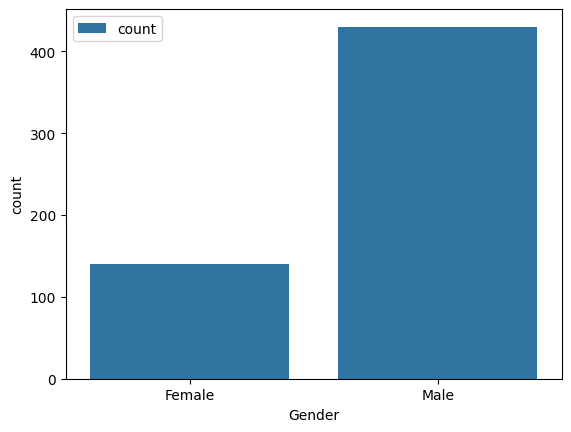

In [18]:
sns.countplot(data=dataset,x='Gender',label='count')

In [19]:
Male,Female=dataset['Gender'].value_counts()
print('Number of patients that are male: ',Male)
print('Number of patients that are female: ',Female)

Number of patients that are male:  430
Number of patients that are female:  140


In [20]:
def partition(x):
  if x=='Male':
    return 1
  return 0
dataset['Gender']=dataset['Gender'].map(partition)

In [21]:
dataset


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [22]:
def partition(x):
  if x==2:
    return 0
  return 1
dataset['Dataset']=dataset['Dataset'].map(partition)

In [23]:
dataset['Dataset']

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 570, dtype: int64

<Axes: >

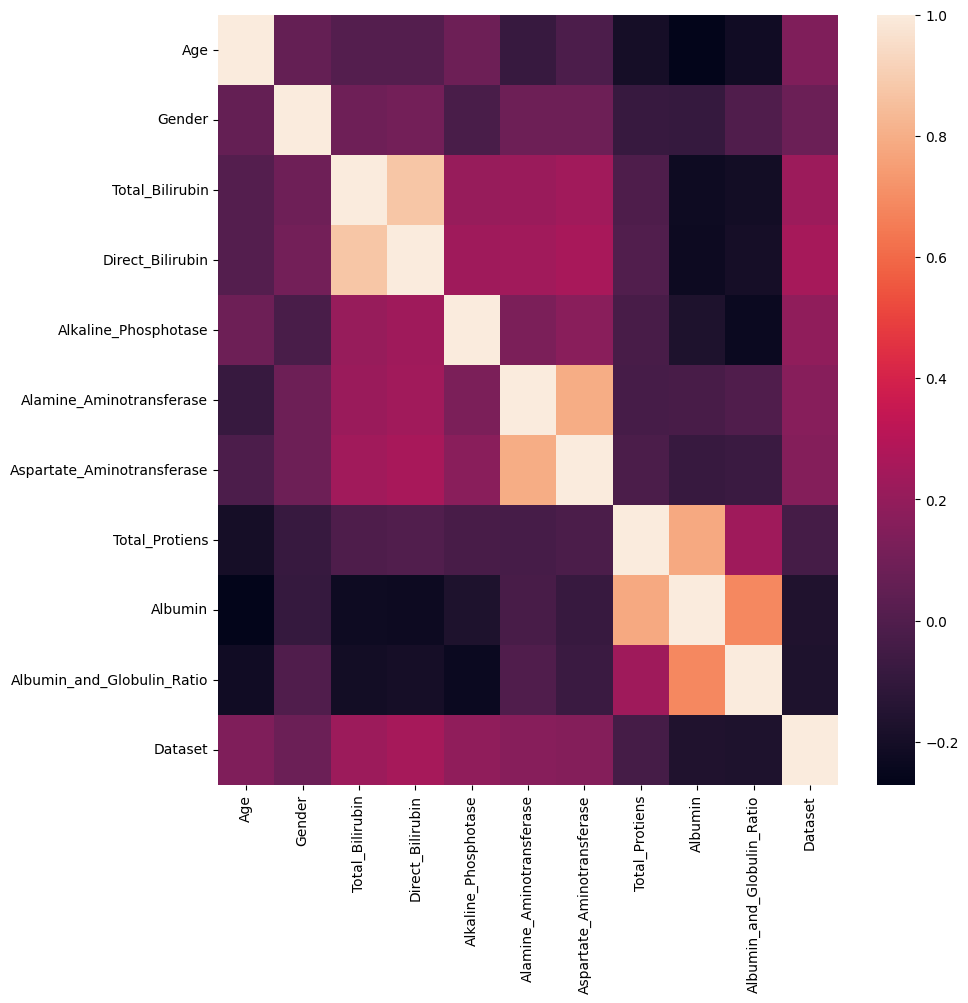

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

In [25]:
x=dataset.iloc[: ,:-1].values
y=dataset.iloc[: ,-1].values

In [26]:
#splitting data into trianing data and testing data
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test=train_test_split(x, y, test_size=0.25, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [28]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [29]:
log_y_pred=log_classifier.predict(x_test)

<Axes: >

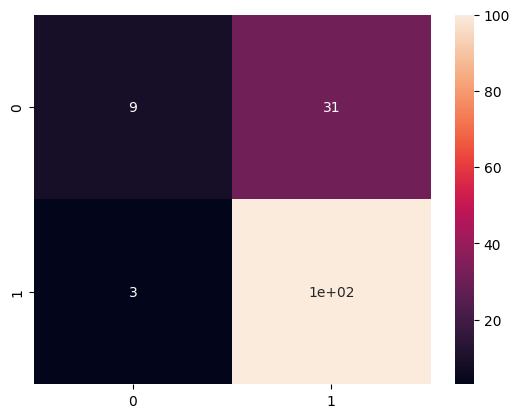

In [30]:
from sklearn.metrics import confusion_matrix
log_cm = confusion_matrix(y_test, log_y_pred)
sns.heatmap(log_cm, annot=True)

In [31]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test, log_y_pred))
print(precision_score(y_test, log_y_pred))

0.7622377622377622
0.7633587786259542


In [32]:
x_train.shape

(427, 10)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors =21, metric='minkowski')
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [34]:
knn_y_pred=knn_classifier.predict(x_test)


<Axes: >

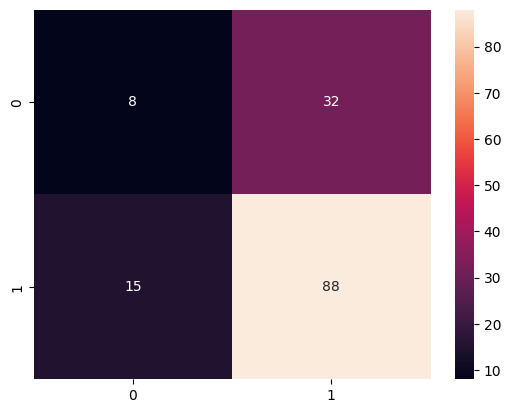

In [35]:
from sklearn.metrics import confusion_matrix
knn_cm=confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm, annot=True)

In [36]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,knn_y_pred))
print(precision_score(y_test, knn_y_pred))

0.6713286713286714
0.7333333333333333


In [37]:
from sklearn.svm import SVC
svm_classifier=SVC(kernel='rbf', random_state = 0)
svm_classifier.fit(x_train, y_train)

SVC(random_state=0)

In [38]:
svm_y_pred=svm_classifier.predict(x_test)

<Axes: >

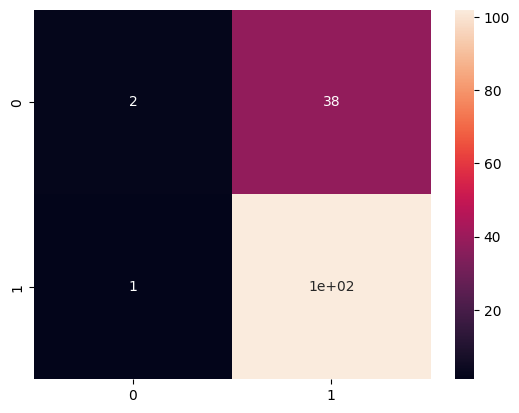

In [39]:
from sklearn.metrics import confusion_matrix
svm_cm=confusion_matrix(y_test, svm_y_pred)
sns.heatmap(svm_cm, annot=True)

In [40]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,svm_y_pred))
print(precision_score(y_test, svm_y_pred))

0.7272727272727273
0.7285714285714285


In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [42]:
#Initialising the ANN
classifier=Sequential()
#Adding the input layer and the first hidden layer
classifier.add(Dense(units=400, activation='relu',input_dim=10))
classifier.add(Dropout (rate=0.1))
# Adding Second hidden layer
classifier.add(Dense(units=400, activation='relu'))
classifier.add(Dropout (rate=0.1))
# Output layer
classifier.add(Dense(units=1, activation='sigmoid'))

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
classifier.fit(x_train, y_train, batch_size=32, epochs = 100)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6629 - loss: 0.5962
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7332 - loss: 0.5167
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6876 - loss: 0.5180
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7221 - loss: 0.5018
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7379 - loss: 0.5047
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7762 - loss: 0.4487
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7391 - loss: 0.4820
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7588 - loss: 0.4712
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7530 - loss: 0.4497
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7200 - loss: 0.4800
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7594 - loss: 0.4467
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step -

In [45]:
ann_y_pred=classifier.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [46]:
ann_y_pred[0]

array([0.8852949], dtype=float32)

In [47]:
ann_y_pred=ann_y_pred >=0.5

<Axes: >

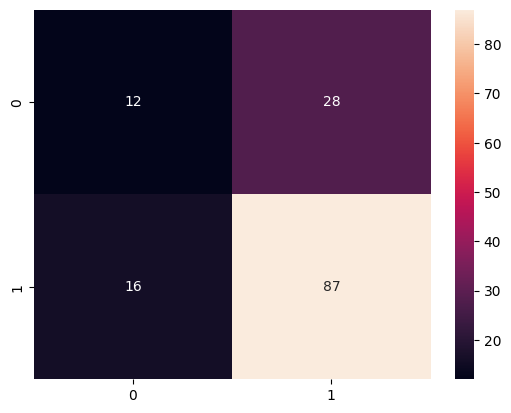

In [48]:
from sklearn.metrics import confusion_matrix
ann_cm=confusion_matrix(y_test, ann_y_pred)
sns.heatmap(ann_cm, annot=True)

In [49]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,ann_y_pred))
print(precision_score(y_test, ann_y_pred))

0.6923076923076923
0.7565217391304347


In [50]:
import pickle
pickle.dump(knn_classifier, open('model.pkl', 'wb'))
pickle.dump(sc, open('sc.pkl', 'wb'))
